In [48]:
a = []
a+=[1]
a

[1]

In [16]:
'hello%.2f' % 2.5

'hello2.50'

0.2
0.25


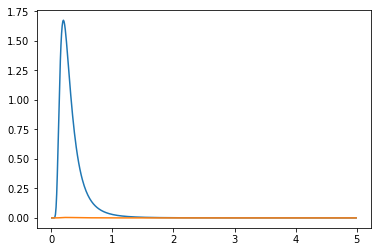

In [3]:
from scipy.stats import invwishart
import numpy as np
import matplotlib.pyplot as plt
execfile('Imports.py')
import Modules.Funcs as funcs

df = 2
scale = np.eye(2)
tdist = invwishart(df=df,scale=scale)
x_scalar = np.arange(.01,5,.01)
x = [xi * np.eye(2) for xi in x_scalar]
y = [tdist.pdf(xxi) for xxi in x]
plt.plot(x_scalar,y)
print(x_scalar[y.index(max(y))])

ya = [funcs.invwishartpdf(xxi,scale,1.01) for xxi in x]

# ya2 = [funcs.invwishartpdf2(xxi,scale,df) for xxi in x]

plt.plot(x_scalar,ya)
print(x_scalar[ya.index(max(ya))])

# print(x_scalar[ya2.index(max(ya2))])




In [8]:
print(funcs.mvgamma(3,1.213))
print(funcs.mvgamma2(1.213))

2.405252115666262
0.8369004892674435


In [2]:
from numpy.linalg import det
nu = 2
scale = np.eye(2)
X = np.eye(2)
p = 2
print(det(X) ** (-(nu+p+1)/2))
print(1/(det(X) ** ((nu+p+1)/2)))

1.0
1.0


In [6]:
print(np.exp(-(3.)/2))
print(np.exp(-1/2. * 3.))

0.22313016014842982
0.22313016014842982


In [8]:
import pickle, sys, os
import pandas as pd
import numpy as np
import time
execfile('Imports.py')
import Modules.Funcs as funcs
from Modules.Classes import Simulation
from Modules.Classes import CopyTweak
from Modules.Classes import Packer
from Modules.Classes import ConjugateJK13
from Modules.Classes import RepresentJK13
from Modules.Classes import NegatedSpace



# Specify default dataname
dataname_def = 'pooled'
participant_def = 'all'
unique_trials_def = 'all'
nchunks = 1000 #number of CHTC instances to run
#Allow for input arguments at the shell
narg = len(sys.argv)

if __name__ == "__main__" and narg>1:

        # if len(sys.argv)<4:
        #         unique_trials = unique_trials_def
        # else:
        #         unique_trials = int(sys.argv[3])
        # if len(sys.argv)<3:
        #         participant = participant_def
        # else:
        #         participant = int(sys.argv[2])
        # if len(sys.argv)<2:
        #         dataname = dataname_def
        # else:
        #         dataname = sys.argv[1]
        dataname = dataname_def
        participant = participant_def
        unique_trials = unique_trials_def

else:
        dataname = dataname_def
        participant = participant_def
        unique_trials = unique_trials_def

execfile('validate_data.py')
# get data from pickle
with open(pickledir+src, "rb" ) as f:
	trials = pickle.load( f )

trials.task = task
# trials = Simulation.extractPptData(trials,participant,unique_trials)

#Get current best parms
with open(pickledir+bestparmchtc,'rb') as f:
    best_params_t = pickle.load(f)
best_params = funcs.compress_chtc_parms(best_params_t)



In [10]:
modelList = [Packer,CopyTweak,ConjugateJK13,RepresentJK13]
ll = dict()
for model in modelList:
    ll[model.model] =  trials.loglike(best_params[model.model],model,parmxform=False,seedrng=True)



In [11]:
ll


{'Copy and Tweak': 4904.744595758372,
 'Hierarchical Sampling': 4936.980172612816,
 'Hierarchical Sampling With Representativeness': 4387.738010502973,
 'PACKER': 4531.399234215766}